In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_scenario0 = pd.read_csv('../experiment/scenario0.csv')
df_scenario1 = pd.read_csv('../experiment/scenario1.csv')
df_scenario2 = pd.read_csv('../experiment/scenario2.csv')
df_scenario3 = pd.read_csv('../experiment/scenario3.csv')
df_scenario4 = pd.read_csv('../experiment/scenario4.csv')
dfs = [df_scenario0, df_scenario1, df_scenario2, df_scenario3, df_scenario4]

In [25]:
def adding_scenario_column(df, s):
    # Add a column with the number of the scenario
    df['scenario'] = s
    return df

In [26]:
def create_subset(df):
    # Create a subset of the dataframe with the desired columns
    df_subset = df[['scenario', 'iteration', 'Step', 
                    'avg_delay', 'avg_waiting','avg_driving_time', 'avg_speed',
                    'tot_collapsed', 'A_collapsed', 'B_collapsed', 'C_collapsed', 'D_collapsed']]
    return df_subset

In [27]:
def concat_dfs(dfs):
    # Create an empty list to store the cleaned dataframes in
    df_list = []
    # Loop over the dataframes
    for s, df in enumerate(dfs):
        # Add a column with the scenario number
        df = adding_scenario_column(df, s)
        # Create a subset of the dataframe
        df_subset = create_subset(df)
        # Append the cleaned dataframe to the list
        df_list.append(df_subset)
    # Concat the dataframes in the list
    full_df = pd.concat(df_list, ignore_index=True)
    return full_df

In [28]:
# Call the concat_function and assign the dataframe to full_df
full_df = concat_dfs(dfs)

In [29]:
full_df

,scenario,iteration,Step,avg_delay,avg_waiting,avg_driving_time,avg_speed,tot_collapsed,A_collapsed,B_collapsed,C_collapsed,D_collapsed
0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
1,0,0,1,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
2,0,0,2,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
3,0,0,3,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
4,0,0,4,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
360045,4,9,7196,25.590198,21.554374,2589.400883,2.408367,1668,1086,289,255,38
360046,4,9,7197,25.726231,21.558471,2589.353025,2.408348,1668,1086,289,255,38
360047,4,9,7198,25.587081,21.590901,2589.682762,2.408118,1668,1086,289,255,38
360048,4,9,7199,25.807225,21.607084,2589.682762,2.408118,1668,1086,289,255,38


In [30]:
# Filter on the rows with only the last time-step, as that is the step we are interested in for this KPI
df_laststep = full_df[full_df['Step']==7200]

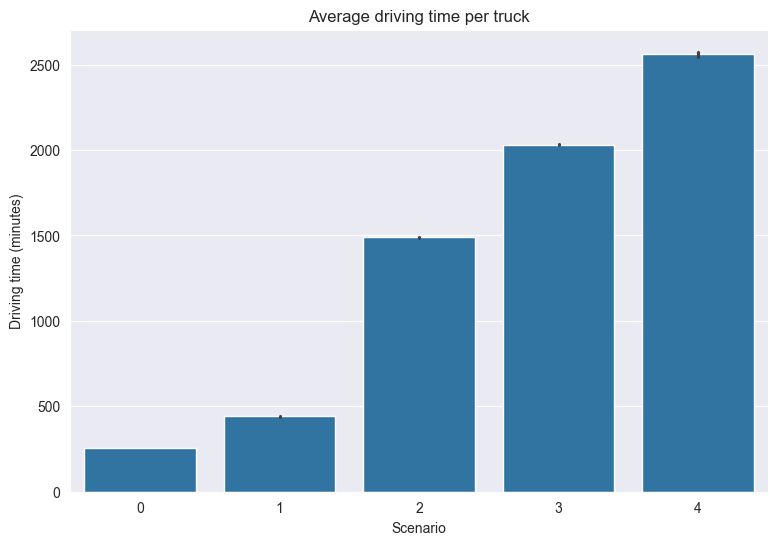

In [31]:
# Create a barplot of the average driving time
plt.figure(figsize=(9, 6))
sns.barplot(x=df_laststep['scenario'], y=df_laststep['avg_driving_time'])
plt.title('Average driving time per truck')
plt.xlabel('Scenario')
plt.ylabel('Driving time (minutes)')
plt.savefig('../img/barplot_avg_driving_time.png')
plt.show()

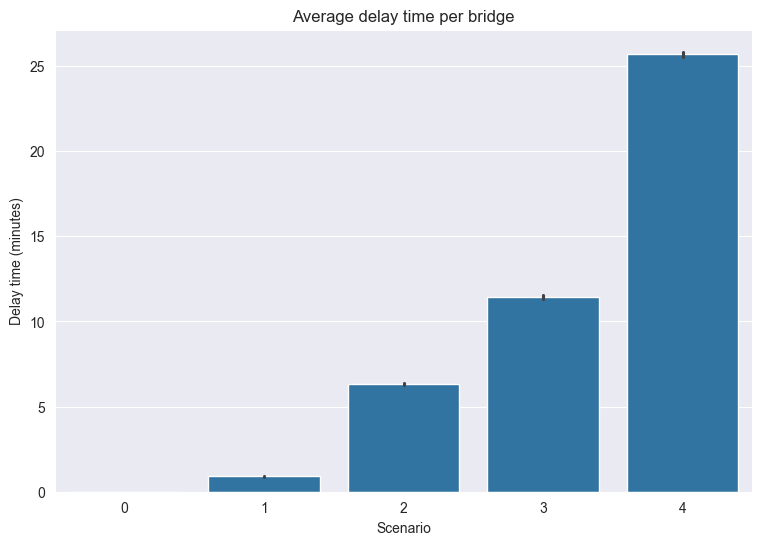

In [32]:
# Create a barplot of the average delay time
plt.figure(figsize=(9, 6))
sns.barplot(x=df_laststep['scenario'], y=df_laststep['avg_delay'])
plt.title('Average delay time per bridge')
plt.xlabel('Scenario')
plt.ylabel('Delay time (minutes)')
plt.savefig('../img/barplot_avg_delay_time.png')
plt.show()

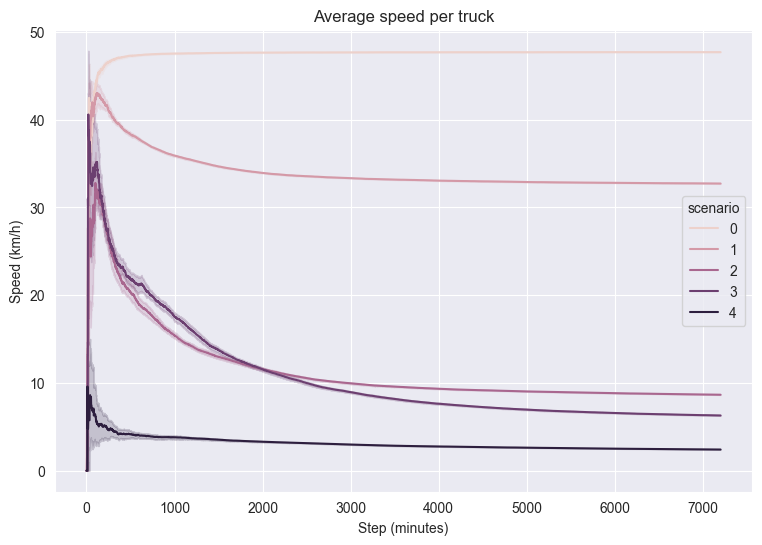

In [11]:
# Create a lineplot of the average speed
plt.figure(figsize=(9, 6))
sns.lineplot(data=full_df, x='Step', y='avg_speed', hue='scenario')
plt.title('Average speed per truck')
plt.xlabel('Step (minutes)')
plt.ylabel('Speed (km/h)')
plt.savefig('../img/lineplot_avg_speed.png')
plt.show()